In [109]:
!pip install matplotlib

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the MNIST data from keras.datasets

In [111]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [112]:
type(X_train)

numpy.ndarray

In [113]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [114]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [115]:
print(X_train[10].shape)

(28, 28)


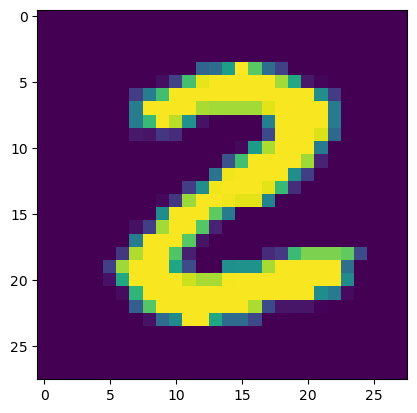

2


In [116]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image labels

In [117]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [118]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [119]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [120]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [121]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\Roshan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8556 - loss: 0.5089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9563 - loss: 0.1454
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9691 - loss: 0.1009
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9771 - loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9846 - loss: 0.0514
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9878 - loss: 0.0427
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0367
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0320
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9922 - loss: 0.0263


TRaiing data accuracy: 98.9%

Accuracy on Test data:

In [124]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9645 - loss: 0.1361
0.9693999886512756


In [125]:
print(X_test.shape)

(10000, 28, 28)


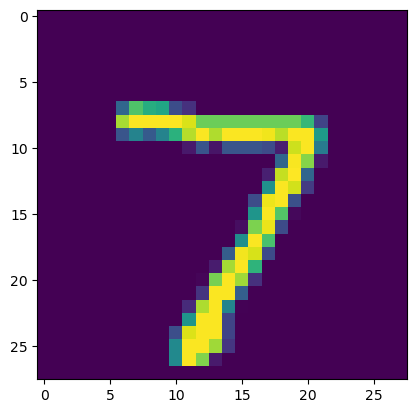

In [126]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [127]:
print(Y_test[0])

7


In [128]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


In [129]:
print(Y_pred.shape)

(10000, 10)


In [130]:
print(Y_pred[0]) #000000100 yesari dinxa

[9.53762083e-06 8.61472078e-03 5.36402166e-02 9.73260343e-01
 4.33113527e-08 1.20212564e-04 1.36070973e-15 9.99999940e-01
 1.11350948e-02 9.89322662e-01]


model.predict() gives the prediction probability of each class for that data point

In [131]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [132]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 4, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 3, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [133]:
Y_pred

array([[9.53762083e-06, 8.61472078e-03, 5.36402166e-02, ...,
        9.99999940e-01, 1.11350948e-02, 9.89322662e-01],
       [4.27255481e-02, 6.20675743e-01, 9.99993980e-01, ...,
        1.75191474e-07, 4.84685272e-01, 2.44279477e-07],
       [1.84356631e-03, 9.99619484e-01, 1.22997435e-02, ...,
        5.28572440e-01, 4.40606683e-01, 5.93093336e-02],
       ...,
       [4.89146235e-09, 9.82206184e-05, 4.20064171e-05, ...,
        9.49597001e-01, 5.38983382e-03, 9.99949515e-01],
       [4.01647731e-06, 3.67856114e-06, 1.08014565e-05, ...,
        4.50424210e-04, 8.49117786e-02, 1.14219101e-05],
       [6.48533851e-02, 7.66565354e-05, 1.70329139e-02, ...,
        1.11960893e-04, 1.45882880e-02, 2.46274431e-04]], dtype=float32)

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [134]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [135]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    3,    7,    0,    1,    1,    1,    9],
       [   0, 1121,    0,    2,    1,    1,    4,    3,    3,    0],
       [   6,    1,  977,   11,    5,    0,    6,   16,    9,    1],
       [   0,    0,    3,  986,    1,    3,    0,    5,    2,   10],
       [   1,    0,    2,    0,  968,    0,    5,    2,    1,    3],
       [   2,    0,    0,   25,    0,  849,    4,    2,    3,    7],
       [   3,    1,    1,    1,    5,    8,  938,    0,    1,    0],
       [   1,    1,    5,    1,    0,    1,    0, 1007,    2,   10],
       [   5,    1,    1,   14,    5,    6,    4,    5,  926,    7],
       [   2,    3,    0,    7,   21,    4,    0,    8,    3,  961]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

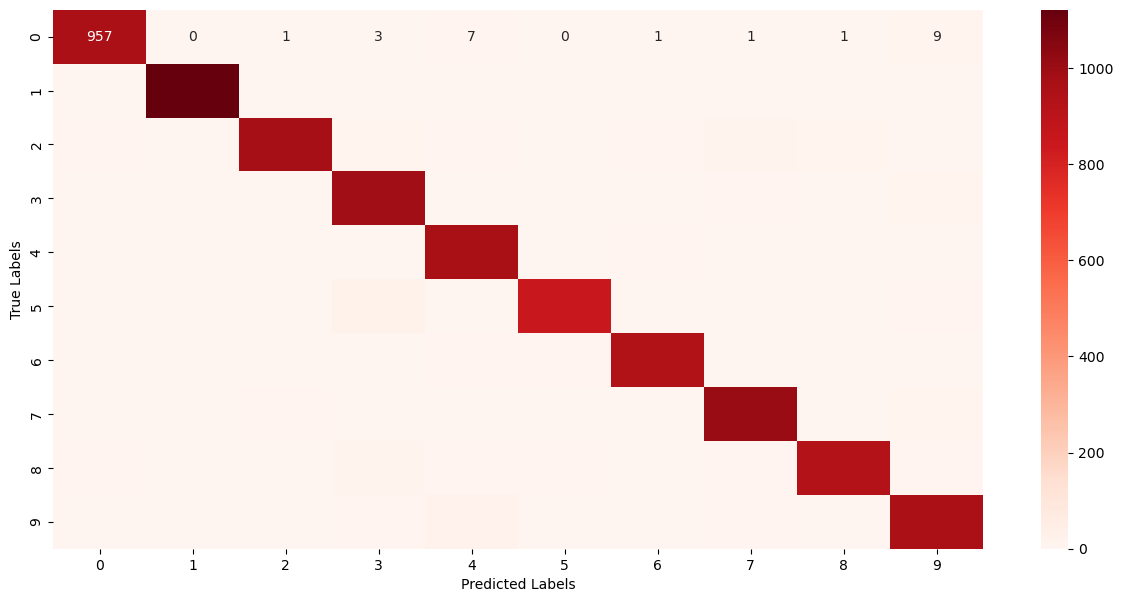

In [136]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Preditive System

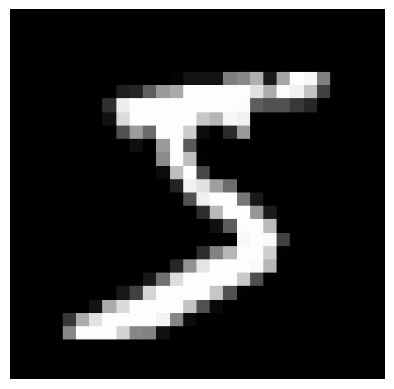

In [177]:
import matplotlib.pyplot as plt
import cv2

# Load the image using OpenCV
input_image = cv2.imread('sphx_glr_nn_tutorial_001.png')

# Convert the image from BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [182]:
type(input_image)

numpy.ndarray

In [183]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [184]:
input_image.shape

(365, 370, 3)

In [185]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [186]:
grayscale.shape

(365, 370)

In [187]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [188]:
input_image_resize.shape

(28, 28)

In [189]:
input_image_resize = input_image_resize/255

In [190]:
type(input_image_resize)

numpy.ndarray

In [191]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [192]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.93741446e-11 1.08315704e-04 1.91420026e-03 9.99999940e-01
  4.51530020e-18 1.00000000e+00 5.48240472e-19 4.03496688e-06
  1.16301464e-07 2.03609884e-01]]


In [193]:
input_pred_label = np.argmax(input_prediction)

In [203]:
print(input_pred_label)

5


Predictive System

Path of the image to be predicted:  sphx_glr_nn_tutorial_001.png


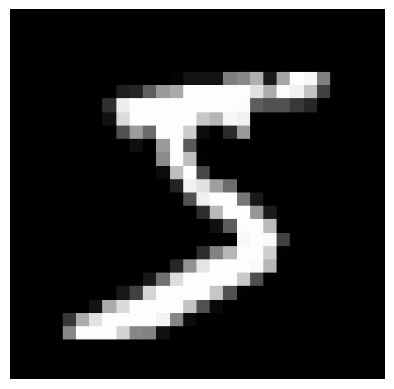

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The Handwritten Digit is recognised as  5


In [204]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)